# Are Relations Relevant in CNNs? *A Study Based on a Facial Dataset*

## Testing FCN with Features Further Apart *(20 Epochs - 15 Layers)*

### Imports, Seed, GPU integration

In [1]:
import numpy as np
import random
import tensorflow as tf

In [2]:
# Seeds for better reproducibility
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [4]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


### Data preparation

In [5]:
test_path = '../../../picasso_dataset/basis-data/middle/test'

In [6]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['no_face', 'face'], batch_size=10, shuffle=False)

Found 3000 images belonging to 2 classes.


In [7]:
assert test_batches.n == 3000
assert test_batches.num_classes == 2

### Loading the trained FCN

In [8]:
filename='../models/FCN-FFA-20E-16L-03.h5'
loaded_model = load_model(filename)

### Accuracy and loss of the trained model

In [9]:
scores = loaded_model.evaluate(test_batches, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Loss: %.2f%%" % (scores[0]*100))

300/300 - 7s - loss: 0.1946 - accuracy: 0.9563
Accuracy: 95.63%
Loss: 19.46%


### Testing the FCN

In [10]:
predictions = loaded_model.predict(x=test_batches, steps=len(test_batches), verbose=0)

### Index of wrongly predicted pictures

In [11]:
y_true=test_batches.classes
y_pred=np.argmax(predictions, axis=-1)
cm = confusion_matrix(y_true = y_true, y_pred = y_pred)

In [12]:
face_but_predicted_no_face=[]
no_face_but_predicted_face=[]

for i in range(len(predictions)):
        if y_true[i] != y_pred[i]:
            if y_true[i] == 1:
                face_but_predicted_no_face.append(i+8001-1500) #Index of file on disk
            else:
                no_face_but_predicted_face.append(i+8001) #Index of file on disk

print("Data from class 'face', that was wrongly predicted as 'no-face' [", len(face_but_predicted_no_face), "] :")
print(face_but_predicted_no_face)
print("----------------------------------------------------------------------------------------------")
print("Data from class 'no-face', that was wrongly predicted as 'face' [", len(no_face_but_predicted_face), "] :")
print(no_face_but_predicted_face)

Data from class 'face', that was wrongly predicted as 'no-face' [ 130 ] :
[8006, 8022, 8050, 8061, 8075, 8079, 8086, 8093, 8095, 8107, 8116, 8130, 8139, 8143, 8161, 8171, 8184, 8188, 8191, 8196, 8200, 8207, 8218, 8220, 8223, 8224, 8233, 8247, 8250, 8295, 8321, 8330, 8339, 8347, 8375, 8380, 8388, 8408, 8409, 8419, 8426, 8438, 8452, 8460, 8461, 8475, 8498, 8508, 8510, 8527, 8575, 8596, 8604, 8650, 8651, 8652, 8668, 8670, 8689, 8696, 8698, 8699, 8705, 8717, 8723, 8725, 8732, 8737, 8756, 8784, 8817, 8823, 8835, 8836, 8838, 8842, 8859, 8878, 8925, 8942, 8948, 8949, 8957, 8963, 8975, 8991, 8998, 9002, 9008, 9015, 9016, 9017, 9032, 9034, 9070, 9076, 9080, 9096, 9098, 9117, 9127, 9171, 9186, 9190, 9194, 9204, 9209, 9220, 9247, 9264, 9308, 9310, 9313, 9317, 9324, 9325, 9337, 9346, 9375, 9401, 9424, 9425, 9432, 9447, 9448, 9451, 9457, 9472, 9476, 9484]
----------------------------------------------------------------------------------------------
Data from class 'no-face', that was wrongly predic

### Confusion matrix

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
test_batches.class_indices

{'no_face': 0, 'face': 1}

Confusion matrix, without normalization
[[1499    1]
 [ 130 1370]]


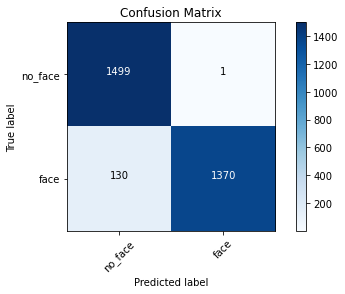

In [15]:
cm_plot_labels = ['no_face','face']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')